 ### LSTM Model No.1 (210209)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import datetime as dt
import pandas as pd

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
stock_code = '004140'
crlng_year = '2010'

Time = str(dt.datetime.now())[:19]
for i in ['-', ':', ' ']:
    Time = Time.replace(i, '')

data_file_name = Time + '-' + stock_code + '-' + crlng_year + ".csv"

df = fdr.DataReader(stock_code, crlng_year)
df.to_csv(data_file_name, sep=',', na_rep='NaN')

df = pd.read_csv(data_file_name, delimiter = ',', header = 0)
for i in ["Change", "Date"]:
    del df[i]
df = df[["Open", "High", "Low", "Volume", "Close"]].to_numpy()

print(df)

[[    2190     2230     2168    22080     2213]
 [    2203     2230     2190    21810     2213]
 [    2225     2305     2203    59600     2279]
 ...
 [    5140     5620     5030 20869570     5360]
 [    5570     5900     5420 40694508     5900]
 [    5760     7670     5680 90274596     7670]]


In [3]:
seq_length = 7

data_dim = 5
output_dim = 1

learning_rate = 0.001
epoch = 1000

train_size_multiplier = 0.7

predict_days = 1

es = EarlyStopping(monitor = "loss", patience=10)

In [4]:
train_size = int(len(df) * train_size_multiplier)
train_set = df[0:train_size]
test_set = df[train_size - seq_length:]

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    
    return numerator / (denominator + 1e-7)

def rvs_MinMaxScaler(data, value):
    diff = np.max(data, 0) - np.min(data, 0)
    back = value * diff + np.min(data, 0)
    return back 

def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    
    return np.array(dataX), np.array(dataY)

train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape, trainY.shape)

[[0.31891656 0.31311429 0.32923311 0.00194016 0.14122962]
 [0.32080967 0.31311429 0.33257403 0.00191644 0.14122962]
 [0.3240134  0.32364504 0.33454822 0.00523704 0.15419368]
 [0.33056648 0.32181971 0.3372817  0.00452266 0.14987232]
 [0.33377021 0.32799775 0.34396355 0.00777076 0.16106855]
 [0.3343527  0.33417579 0.34867122 0.00526076 0.16362208]
 [0.33886705 0.33347374 0.3453303  0.00463337 0.17226478]] -> [0.15497938]
[[0.32080967 0.31311429 0.33257403 0.00191644 0.14122962]
 [0.3240134  0.32364504 0.33454822 0.00523704 0.15419368]
 [0.33056648 0.32181971 0.3372817  0.00452266 0.14987232]
 [0.33377021 0.32799775 0.34396355 0.00777076 0.16106855]
 [0.3343527  0.33417579 0.34867122 0.00526076 0.16362208]
 [0.33886705 0.33347374 0.3453303  0.00463337 0.17226478]
 [0.34396389 0.33782645 0.34669704 0.00388912 0.15497938]] -> [0.13769397]
[[0.3240134  0.32364504 0.33454822 0.00523704 0.15419368]
 [0.33056648 0.32181971 0.3372817  0.00452266 0.14987232]
 [0.33377021 0.32799775 0.34396355 0.0

 [0.25469637 0.24557709 0.25892179 0.00189974 0.04340994]] -> [0.04596346]
[[0.25600699 0.24754283 0.26302202 0.0018479  0.05205264]
 [0.25673511 0.24992979 0.2649962  0.00182506 0.05028482]
 [0.25673511 0.24754283 0.26226272 0.00212531 0.05028482]
 [0.25673511 0.24754283 0.26302202 0.00198058 0.05107052]
 [0.25542449 0.24627914 0.25421412 0.00701552 0.04773129]
 [0.25469637 0.24557709 0.25892179 0.00189974 0.04340994]
 [0.25091015 0.24992979 0.25694761 0.00398489 0.04596346]] -> [0.04164211]
[[0.25673511 0.24992979 0.2649962  0.00182506 0.05028482]
 [0.25673511 0.24754283 0.26226272 0.00212531 0.05028482]
 [0.25673511 0.24754283 0.26302202 0.00198058 0.05107052]
 [0.25542449 0.24627914 0.25421412 0.00701552 0.04773129]
 [0.25469637 0.24557709 0.25892179 0.00189974 0.04340994]
 [0.25091015 0.24992979 0.25694761 0.00398489 0.04596346]
 [0.25091015 0.25063184 0.25831435 0.00421327 0.04164211]] -> [0.05814182]
[[0.25673511 0.24754283 0.26226272 0.00212531 0.05028482]
 [0.25673511 0.247542

 [0.81389253 0.79458017 0.81381929 0.02426418 0.79748576]] -> [0.75407582]
[[0.77151595 0.75245717 0.79377373 0.00959292 0.75584365]
 [0.77151595 0.78840213 0.80182232 0.02601965 0.78020035]
 [0.80733945 0.77843302 0.78435839 0.01264841 0.77155765]
 [0.80224261 0.78966582 0.82854973 0.01555515 0.80436064]
 [0.82146498 0.80075821 0.83796507 0.01839237 0.79571793]
 [0.81389253 0.79458017 0.81381929 0.02426418 0.79748576]
 [0.79845639 0.76986801 0.80182232 0.02050221 0.75407582]] -> [0.71596936]
[[0.77151595 0.78840213 0.80182232 0.02601965 0.78020035]
 [0.80733945 0.77843302 0.78435839 0.01264841 0.77155765]
 [0.80224261 0.78966582 0.82854973 0.01555515 0.80436064]
 [0.82146498 0.80075821 0.83796507 0.01839237 0.79571793]
 [0.81389253 0.79458017 0.81381929 0.02426418 0.79748576]
 [0.79845639 0.76986801 0.80182232 0.02050221 0.75407582]
 [0.77399155 0.74627914 0.77767654 0.01610486 0.71596936]] -> [0.72480849]
[[0.80733945 0.77843302 0.78435839 0.01264841 0.77155765]
 [0.80224261 0.789665

 [0.3234309  0.3118506  0.32862566 0.0091244  0.13769397]] -> [0.13847967]
[[0.33813893 0.33347374 0.35140471 0.0042239  0.17226478]
 [0.3452745  0.33417579 0.35398633 0.00382778 0.16892555]
 [0.33944954 0.33038472 0.34001519 0.00644261 0.15065802]
 [0.32983836 0.32055602 0.34062263 0.009475   0.15065802]
 [0.32532401 0.317467   0.33667426 0.00423532 0.14378315]
 [0.3234309  0.3118506  0.32862566 0.0091244  0.13769397]
 [0.31571283 0.31002527 0.32725892 0.00568966 0.13847967]] -> [0.13160479]
[[0.3452745  0.33417579 0.35398633 0.00382778 0.16892555]
 [0.33944954 0.33038472 0.34001519 0.00644261 0.15065802]
 [0.32983836 0.32055602 0.34062263 0.009475   0.15065802]
 [0.32532401 0.317467   0.33667426 0.00423532 0.14378315]
 [0.3234309  0.3118506  0.32862566 0.0091244  0.13769397]
 [0.31571283 0.31002527 0.32725892 0.00568966 0.13847967]
 [0.31760594 0.31002527 0.32528474 0.00646748 0.13160479]] -> [0.13258692]
[[0.33944954 0.33038472 0.34001519 0.00644261 0.15065802]
 [0.32983836 0.320556

 [0.22717344 0.22142657 0.23416856 0.00221318 0.01296405]] -> [0.01826753]
[[0.22324159 0.22521764 0.22748671 0.00255209 0.01217835]
 [0.22848405 0.22086493 0.23158694 0.00287642 0.01296405]
 [0.22848405 0.22212862 0.23614275 0.00310321 0.01473188]
 [0.23037717 0.22212862 0.23614275 0.0018566  0.01649971]
 [0.23037717 0.22269026 0.23553531 0.0018327  0.01571401]
 [0.22717344 0.22142657 0.23416856 0.00221318 0.01296405]
 [0.22964905 0.23195732 0.23948368 0.01104409 0.01826753]] -> [0.01826753]
[[0.22848405 0.22086493 0.23158694 0.00287642 0.01296405]
 [0.22848405 0.22212862 0.23614275 0.00310321 0.01473188]
 [0.23037717 0.22212862 0.23614275 0.0018566  0.01649971]
 [0.23037717 0.22269026 0.23553531 0.0018327  0.01571401]
 [0.22717344 0.22142657 0.23416856 0.00221318 0.01296405]
 [0.22964905 0.23195732 0.23948368 0.01104409 0.01826753]
 [0.22906655 0.22577928 0.23887623 0.00378464 0.01826753]] -> [0.01394618]
[[0.22848405 0.22212862 0.23614275 0.00310321 0.01473188]
 [0.23037717 0.222128

 [0.31571283 0.30749789 0.323918   0.01063681 0.13160479]] -> [0.12040856]
[[0.31571283 0.31311429 0.32528474 0.00850456 0.13415832]
 [0.31644095 0.31241224 0.32452544 0.00505814 0.13337262]
 [0.31513033 0.3062342  0.31647684 0.01246459 0.13258692]
 [0.31513033 0.3062342  0.32118451 0.0082218  0.12728344]
 [0.30988787 0.30693625 0.31723614 0.01217058 0.13258692]
 [0.31571283 0.30749789 0.323918   0.01063681 0.13160479]
 [0.31119849 0.30188149 0.31723614 0.0064601  0.12040856]] -> [0.11785504]
[[0.31644095 0.31241224 0.32452544 0.00505814 0.13337262]
 [0.31513033 0.3062342  0.31647684 0.01246459 0.13258692]
 [0.31513033 0.3062342  0.32118451 0.0082218  0.12728344]
 [0.30988787 0.30693625 0.31723614 0.01217058 0.13258692]
 [0.31571283 0.30749789 0.323918   0.01063681 0.13160479]
 [0.31119849 0.30188149 0.31723614 0.0064601  0.12040856]
 [0.3125091  0.30131985 0.30979499 0.01077652 0.11785504]] -> [0.10744451]
[[0.31513033 0.3062342  0.31647684 0.01246459 0.13258692]
 [0.31513033 0.306234

 [0.28542304 0.28011794 0.29536826 0.00735725 0.09251621]] -> [0.09939108]
[[0.29561672 0.28784049 0.30372058 0.0044209  0.10037321]
 [0.29561672 0.28573434 0.30447988 0.00439832 0.10135533]
 [0.29197612 0.28503229 0.30068337 0.01068655 0.09644471]
 [0.28979176 0.28081999 0.29309036 0.0105188  0.09349833]
 [0.29197612 0.28152204 0.29688686 0.00377076 0.09546258]
 [0.28542304 0.28011794 0.29536826 0.00735725 0.09251621]
 [0.28251056 0.28152204 0.29460896 0.00921165 0.09939108]] -> [0.09939108]
[[0.29561672 0.28573434 0.30447988 0.00439832 0.10135533]
 [0.29197612 0.28503229 0.30068337 0.01068655 0.09644471]
 [0.28979176 0.28081999 0.29309036 0.0105188  0.09349833]
 [0.29197612 0.28152204 0.29688686 0.00377076 0.09546258]
 [0.28542304 0.28011794 0.29536826 0.00735725 0.09251621]
 [0.28251056 0.28152204 0.29460896 0.00921165 0.09939108]
 [0.28906364 0.28292614 0.30068337 0.0049577  0.09939108]] -> [0.09546258]
[[0.29197612 0.28503229 0.30068337 0.01068655 0.09644471]
 [0.28979176 0.280819

 [0.10612691 0.05313243 0.10011123 0.00116158 0.0587314 ]] -> [0.05794832]
[[0.11597374 0.05947661 0.11012236 0.00106649 0.06812843]
 [0.12035011 0.05947661 0.10789766 0.00110737 0.06186374]
 [0.11816193 0.07057891 0.1134594  0.00906233 0.06577917]
 [0.1083151  0.05154639 0.10344828 0.00200902 0.05794832]
 [0.10175055 0.04996035 0.09677419 0.00113148 0.06029757]
 [0.10612691 0.05313243 0.10011123 0.00116158 0.0587314 ]
 [0.09846827 0.05471848 0.10011123 0.00092111 0.05794832]] -> [0.05716523]
[[0.12035011 0.05947661 0.10789766 0.00110737 0.06186374]
 [0.11816193 0.07057891 0.1134594  0.00906233 0.06577917]
 [0.1083151  0.05154639 0.10344828 0.00200902 0.05794832]
 [0.10175055 0.04996035 0.09677419 0.00113148 0.06029757]
 [0.10612691 0.05313243 0.10011123 0.00116158 0.0587314 ]
 [0.09846827 0.05471848 0.10011123 0.00092111 0.05794832]
 [0.1083151  0.05075337 0.10011123 0.00067892 0.05716523]] -> [0.05951449]
[[0.11816193 0.07057891 0.1134594  0.00906233 0.06577917]
 [0.1083151  0.051546

 [0.11269147 0.05392546 0.10233593 0.00182177 0.064213  ]] -> [0.03680501]
[[0.12472648 0.06264869 0.1134594  0.00172555 0.06812843]
 [0.11269147 0.05789056 0.09566185 0.00306276 0.0532498 ]
 [0.08752735 0.05947661 0.09010011 0.00256551 0.06186374]
 [0.10393873 0.05789056 0.10344828 0.00061535 0.06499608]
 [0.10612691 0.06740682 0.10567297 0.00272301 0.06656226]
 [0.11269147 0.05392546 0.10233593 0.00182177 0.064213  ]
 [0.10612691 0.05233941 0.07452725 0.00301771 0.03680501]] -> [0.03680501]
[[0.11269147 0.05789056 0.09566185 0.00306276 0.0532498 ]
 [0.08752735 0.05947661 0.09010011 0.00256551 0.06186374]
 [0.10393873 0.05789056 0.10344828 0.00061535 0.06499608]
 [0.10612691 0.06740682 0.10567297 0.00272301 0.06656226]
 [0.11269147 0.05392546 0.10233593 0.00182177 0.064213  ]
 [0.10612691 0.05233941 0.07452725 0.00301771 0.03680501]
 [0.06455142 0.03885805 0.05116796 0.00414167 0.03680501]] -> [0.03993735]
[[0.08752735 0.05947661 0.09010011 0.00256551 0.06186374]
 [0.10393873 0.057890

 [0.15864333 0.09119746 0.14794216 0.00419809 0.0908379 ]] -> [0.09397024]
[[0.13676149 0.07930214 0.13570634 0.00721403 0.08065779]
 [0.12910284 0.07216495 0.12791991 0.00537422 0.08222396]
 [0.13238512 0.08247423 0.13570634 0.00606414 0.0908379 ]
 [0.1487965  0.09040444 0.14794216 0.00899236 0.09710258]
 [0.15426696 0.08961142 0.15795328 0.00470158 0.09866875]
 [0.15864333 0.09119746 0.14794216 0.00419809 0.0908379 ]
 [0.13676149 0.09436955 0.13904338 0.01408681 0.09397024]] -> [0.10571652]
[[0.12910284 0.07216495 0.12791991 0.00537422 0.08222396]
 [0.13238512 0.08247423 0.13570634 0.00606414 0.0908379 ]
 [0.1487965  0.09040444 0.14794216 0.00899236 0.09710258]
 [0.15426696 0.08961142 0.15795328 0.00470158 0.09866875]
 [0.15864333 0.09119746 0.14794216 0.00419809 0.0908379 ]
 [0.13676149 0.09436955 0.13904338 0.01408681 0.09397024]
 [0.14989059 0.12371134 0.14349277 0.11958734 0.10571652]] -> [0.10728269]
[[0.13238512 0.08247423 0.13570634 0.00606414 0.0908379 ]
 [0.1487965  0.090404

In [5]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.LSTM(units = 1, input_shape = (seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units = output_dim, activation = "tanh"))

print(tf.model.summary())

tf.model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(lr = learning_rate))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 28        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
tf.model.fit(trainX, trainY, epochs = epoch, batch_size=16, callbacks=[es])

Epoch 1/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2243
Epoch 2/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0290A: 0s - loss: 0.02
Epoch 4/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 6/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 7/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 8/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 9/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 10/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 11/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 12/1000
120/120 [==============================] - 0s 2ms/ste

120/120 [==============================] - 0s 2ms/step - loss: 5.7684e-04
Epoch 94/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.7686e-04
Epoch 95/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.7886e-04
Epoch 96/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.8015e-04
Epoch 97/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.7634e-04
Epoch 98/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.8113e-04A: 0s - loss: 4.8621
Epoch 99/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.7103e-04
Epoch 100/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.7502e-04
Epoch 101/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.6723e-04
Epoch 102/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.7111e-04
Epoch 103/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.6395e-04
Epoch 104/1000
120/120

120/120 [==============================] - 0s 2ms/step - loss: 5.1396e-04
Epoch 185/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.1430e-04
Epoch 186/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.0857e-04
Epoch 187/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.1016e-04A: 0s - loss: 5.3775e-0
Epoch 188/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.0938e-04
Epoch 189/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.1565e-04
Epoch 190/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.1070e-04
Epoch 191/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.0806e-04
Epoch 192/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.0878e-04
Epoch 193/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.0744e-04
Epoch 194/1000
120/120 [==============================] - 0s 2ms/step - loss: 5.0901e-04
Epoch 195/100

KeyboardInterrupt: 

60/60 [==============================] - 0s 781us/step - loss: 0.0053
0.005282765254378319
26/26 [==============================] - 0s 806us/step - loss: 3.5448e-04
0.000354482646798715


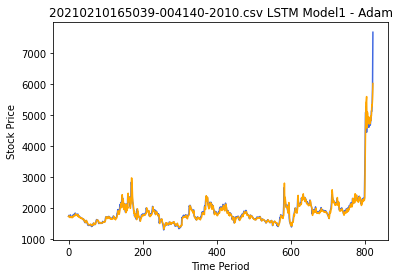

In [17]:
test_predict = tf.model.predict(testX)

print(tf.model.evaluate(trainX, trainY))
print(tf.model.evaluate(testX, testY))

test_predict_rmms = rvs_MinMaxScaler(df[train_size - seq_length:, [-1]], test_predict)
testY_rmms = rvs_MinMaxScaler(df[train_size - seq_length:, [-1]], testY)

plt.plot(testY_rmms, 'royalblue', label = "actual")
plt.plot(test_predict_rmms, 'orange', label = "predicted")
plt.title(data_file_name + " LSTM Model1 - Adam")
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

In [12]:
tf.model.fit(testX, testY, epochs = epoch, callbacks=[es], batch_size=16)

Epoch 1/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 2/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.6994e-04
Epoch 3/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.4466e-04
Epoch 4/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.3924e-04
Epoch 5/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.2841e-04
Epoch 6/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.2938e-04
Epoch 7/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.2856e-04
Epoch 8/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.2122e-04
Epoch 9/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.1635e-04
Epoch 10/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.0198e-04
Epoch 11/1000
52/52 [==============================] - 0s 2ms/step - loss: 4.0863e-04
Epoch 12/1000
52/52 [==============================] - 0s 2ms/step 

60/60 [==============================] - 0s 682us/step - loss: 0.0053
0.005282765254378319
26/26 [==============================] - 0s 997us/step - loss: 3.5448e-04
0.000354482646798715


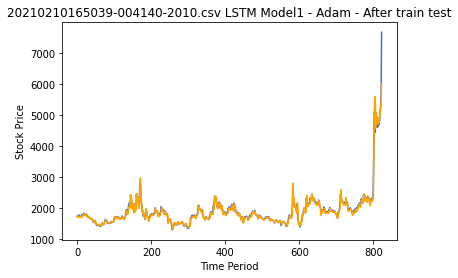

In [13]:
test_predict = tf.model.predict(testX)

print(tf.model.evaluate(trainX, trainY))
print(tf.model.evaluate(testX, testY))

test_predict_rmms = rvs_MinMaxScaler(df[train_size - seq_length:, [-1]], test_predict)
testY_rmms = rvs_MinMaxScaler(df[train_size - seq_length:, [-1]], testY)

plt.plot(testY_rmms, 'royalblue', label = "actual")
plt.plot(test_predict_rmms, 'orange', label = "predicted")
plt.title(data_file_name + " LSTM Model1 - Adam - After train test")
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

In [14]:
predict_future = testX[-1].reshape(-1, 7, 5)

predict_future_data = tf.model.predict(predict_future)

predict_future_data = rvs_MinMaxScaler(df[train_size - seq_length:, [-1]], predict_future_data[0][0])
print(predict_future_data[0])

6014.196379482746


In [16]:
 print(predict_future)

[[[0.77789934 0.54004758 0.7541713  0.04106459 0.53171496]
  [0.78993435 0.61617764 0.76529477 0.25269331 0.54972592]
  [0.79212254 0.56463125 0.77753059 0.07638031 0.55520752]
  [0.79868709 0.60666138 0.7942158  0.23609265 0.60219264]
  [0.84682713 0.72720063 0.84427141 0.52245938 0.60062647]
  [0.8643326  0.67486122 0.85539488 0.22461399 0.63821457]
  [0.95842451 0.71927042 0.94215795 0.43835472 0.72278778]]]


In [15]:
print(rvs_MinMaxScaler(df[train_size - seq_length:, [-1]], test_predict))

[[1717.63431557]
 [1707.79805228]
 [1738.2099006 ]
 [1726.1773352 ]
 [1682.85766883]
 [1701.05382349]
 [1713.5681501 ]
 [1694.83678713]
 [1686.12878796]
 [1701.3011501 ]
 [1679.33798622]
 [1709.71724775]
 [1722.45026264]
 [1706.86578464]
 [1744.27846488]
 [1753.44976734]
 [1742.64365457]
 [1739.68715258]
 [1748.89494274]
 [1806.17476642]
 [1756.63951464]
 [1756.90244485]
 [1769.42495383]
 [1755.97502954]
 [1749.05135933]
 [1728.53709456]
 [1776.58572268]
 [1702.12747499]
 [1722.11878125]
 [1710.91782123]
 [1708.44055913]
 [1674.06423042]
 [1671.86728608]
 [1681.98332004]
 [1655.73865624]
 [1665.65755202]
 [1667.41214851]
 [1638.44108827]
 [1635.81069205]
 [1632.88451718]
 [1614.32821902]
 [1629.84471669]
 [1618.0528654 ]
 [1573.74903038]
 [1549.2173614 ]
 [1531.85243154]
 [1523.8729731 ]
 [1562.60736881]
 [1592.27806982]
 [1578.29048727]
 [1544.54798352]
 [1511.02652287]
 [1501.35107659]
 [1456.14823862]
 [1451.0524614 ]
 [1446.62708009]
 [1448.36622759]
 [1451.49207385]
 [1458.6598952